## Squadrone
Unlocking minds, defying gravity

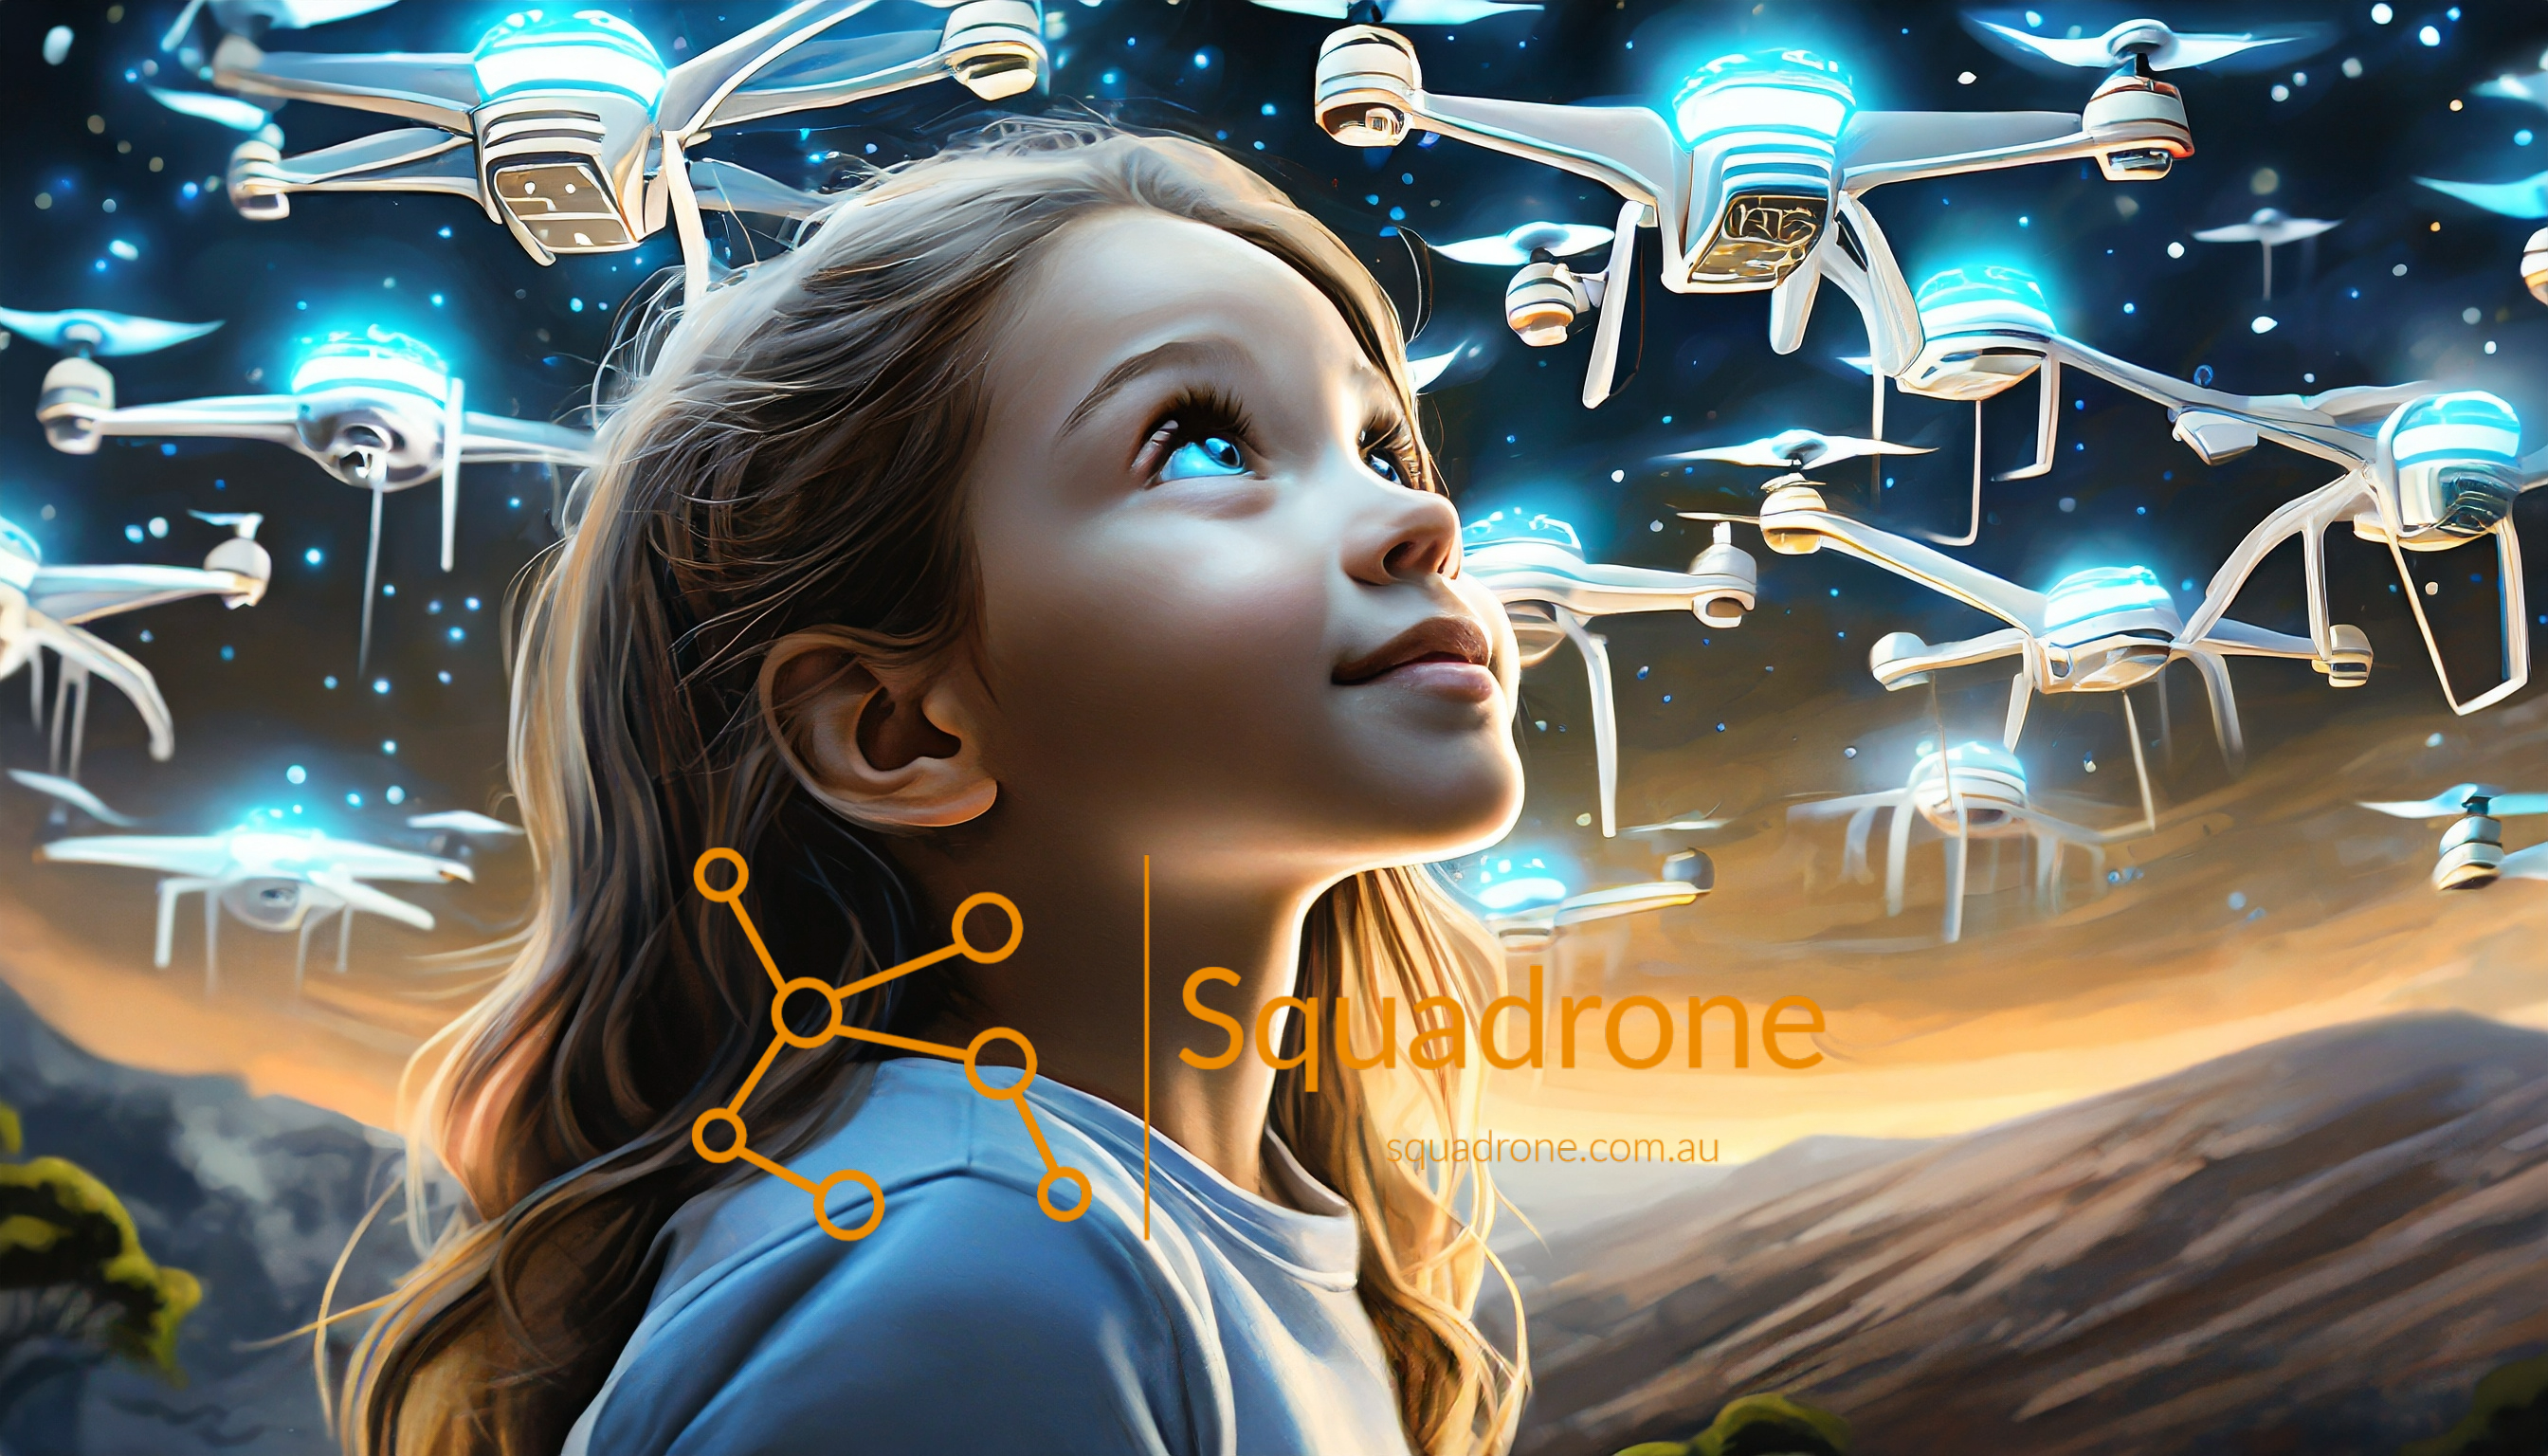

In [1]:

# Display Squadrone Logo
from IPython.display import display, Image

# Set the path to the logo
logo_path = r"C:\Users\00097159\OneDrive - Squadrone PTY LTD\Shared Documents - squadron@com.au\Marketing\Logos Squadrone\Squadrone girl drones 231026.png"

# Display the logo
display(Image(filename=logo_path))


# Voice-Controlled Drone Control with Tello and Vosk
This Jupyter Notebook demonstrates how to build a voice-controlled drone system using the Tello drone, Vosk for speech recognition, and PyAudio. Follow the steps below to understand the code and set up the project.

## Prerequisites
Before running this notebook, ensure you have installed the following libraries:
- `djitellopy` for controlling the Tello drone.
- `vosk` for speech recognition.
- `pyaudio` for microphone input.

Additionally, download a Vosk model (e.g., the small English model) and place it in the appropriate directory. Replace the model path in the code with your actual path.

In [ ]:
# Step 1: Import Required Libraries
import pyaudio
from vosk import Model, KaldiRecognizer
from djitellopy import Tello

# Ensure all libraries are installed before proceeding.

## Step 2: Initialize the Tello Drone
Connect to the Tello drone using the `djitellopy` library.

In [ ]:
# Initialize Tello
tello = Tello()
tello.connect()

## Step 3: Initialize Vosk Speech Recognition
Load the Vosk model for speech recognition and set up the Kaldi recognizer.

In [ ]:
# Initialize Vosk model
model = Model(r"C:\Users\00097159\Squadrone\vosk-model-small-en-us-0.15")
recognizer = KaldiRecognizer(model, 16000)

## Step 4: Set Up PyAudio for Microphone Input
Initialize the microphone input stream using PyAudio.

In [ ]:
# Initialize PyAudio
mic = pyaudio.PyAudio()
listening = False

## Step 5: Create a Function to Capture Voice Commands
Capture audio from the microphone and process it using the Vosk recognizer.

In [ ]:
def get_command():
    global listening
    listening = True
    stream = mic.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=8192)
    stream.start_stream()
    while listening:
        try:
            data = stream.read(4096)
            if recognizer.AcceptWaveform(data):
                result = recognizer.Result()
                response = result[14:-3]  # Extracting the recognized command from the result string
                listening = False
                stream.stop_stream()
                stream.close()
                return response
        except OSError:
            pass

## Step 6: Analyse and Execute the Command
Map the recognized command to a specific drone action.

In [ ]:
def analyze_command(command):
    try:
        if command == "take off":
            tello.takeoff()
        elif command == "land":
            tello.land()
        elif command == "move up":
            tello.move_up(100)
        elif command == "do a back flip":
            tello.flip_back()
        elif command == "do a front flip":
            tello.flip_forward()
        elif command == "say hello":
            tello.rotate_clockwise(360)
        else: 
            print("I don't understand the command, add it!")
    except Exception as e:
        print(f"Error executing command: {e}")

## Step 7: Run the Command Loop
Keep listening for commands and execute them as they are recognized.

In [ ]:
while True:
    print("Waiting for command...")
    command = get_command()
    if command:
        print(f"Command received: {command}")
        analyze_command(command)
    else:
        print("No command received.")